# PREDICTION DE LA PRESENCE D'UNE MALADIE CARDIAQUE

## Première partie : Analyse exploratoire approfondie (EDA)
Dans cette première partie, nous effectuons une analyse exploratoire sur le jeu de donnée qui nous est mis à disposition dans cet exercice. Cette analyse nous permettra de mieux comprendre le jeu de donnée à notre disposition dans l'optique de pouvoir faire une bonne modellisation après. Notons que notre analyse se scinde en deux, une première qualifié de preleminaire où nous
familiarisons avec le jeu de donnée et une deuxième où nous faisons la visualisation graphique des données.

### A) preleminaires 


Dans cette première partie, nous effectuons une analyse exploratoire sur le jeu de donnée qui nous est mis à disposition dans cet exercice. Cette analyse nous permettra de mieux comprendre le jeu de donnée à notre disposition dans l'optique de pouvoir faire une bonne modellisation après.

Dans la ligne qui suit vous y trouverez les differentes librairies qui nous permettront d'effectuer notre analyse exploratoire


In [1]:
import pandas as pd #librairie pandas me permettant de faire des manip sur des tableaux
import matplotlib.pyplot as plt #librairie me permettant de faire des visualisations graphiques
import seaborn as sns #alternative à la librairie précedente

Maintenant les differentes librairies nécessaire importées, débutons le travail en commençant par charger le jeu de donnée dans la ligne qui suit,  remarquons toutefois que le fichier mis à disposition servant de support de donnée est ouvert pour voir sa structure. Notamment c'est un fichier excel avec pour extension xlsx.

In [2]:
df = pd.read_excel("heart_disease.xlsx") #comme nous l'avons dis, nous avons affaire à un fichier excel nous utilisons donc 
                                         # la librairie pandas et l'attribut read_excel puis le nom du fichier

### Nous verifions ici si le jeu de donnée a bien été chargé

In [3]:
df.head(10)

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0
5,39,homme,DNA,120,339,0,Normal,170,Non,0.0,Ascendant,0
6,45,femme,AA,130,237,0,Normal,170,Non,0.0,Ascendant,0
7,54,homme,AA,110,208,0,Normal,142,Non,0.0,Ascendant,0
8,37,homme,ASY,140,207,0,Normal,130,Oui,1.5,Plat,1
9,48,femme,AA,120,284,0,Normal,120,Non,0.0,Ascendant,0


### Commençons par verifier le nombre de ligne et de colonne de ce jeu de donnée

In [4]:
df.shape

(918, 12)

Dans ce jeu de donnée, nous avons 918 lignes et 12 colonnes soit 12 variables et 918 individus

### Identifions la variable cible

In [5]:
df[["CŒUR"]]

,CŒUR
0,0
1,1
2,0
3,1
4,0
...,...
913,1
914,1
915,1
916,1


la variable cible, c'est la variable coeur

### Un coup doeil rapide sur les métadata en vue de mieux comprendre la nature et le type des variables dans ce jeu de donnée

AGE : Ã¢ge du patient 
SEXE : sexe du patient [homme, femme]
TDT : type de douleur thoracique [AT : angine typique, AA : angine atypique, DNA : douleur non angineuse, ASY : asymptomatique]
PAR : pression artÃ©rielle au repos [mm Hg]
CHOLESTEROL : cholestÃ©rol sÃ©rique [mm/dl]
GAJ : glycÃ©mie Ã  jeun [1 : si glycÃ©mie Ã  jeun > 120 mg/dl, 0 : sinon]
ECG au repos : rÃ©sultats de l'Ã©lectrocardiogramme au repos [Normal : normal, ST : prÃ©sentant une anomalie de l'onde ST-T , HVG : montrant une hypertrophie ventriculaire gauche probable]
FCMAX : frÃ©quence cardiaque maximale atteinte 
ANGINE : angine induite par l'exercice [Oui, Non]
DEPRESSION : Valeur numÃ©rique mesurÃ©e en dÃ©pression
PENTE: la pente du segment ST d'exercice de pointe [Ascendant, Plat, Descendant]
COEUR : maladie cardiaque[1 : PrÃ©sence de la maladie, 0 : Absence de la maladie]

### Donnons à présent le type de chaque variable dans ce jeu de donnée

In [6]:
df.dtypes

AGE              int64
SEXE            object
TDT             object
PAR              int64
CHOLESTEROL      int64
GAJ              int64
ECG             object
FCMAX            int64
ANGINE          object
DEPRESSION     float64
PENTE           object
CŒUR             int64
dtype: object

### Type des variables
variable de type numérique : l'age, le coeur(variable cible), la pression artérielle sont des variables de type numérique, la fréquence cardiaque maximale atteinte, le taux de cholesterol, la glycémie.

variable de type décimale : la dépression.

variable de type chaine de charactère : le sexe, le type de couleur thoracique, le résultats de l'électrocardiogramme au repos, l'angine, la pente du segment d'exercice

### nature des variables
en regardant de près les métadata le coeur, le sexe, le type de couleur thoracique, le résultats de l'électrocardiogramme au repos, l'angine sont des variables 
qualitatives le coeur representant la variable maladie cardiaque aurait déjà été encodé idem pour la variable glycémie elle 
aussi aurait déjà été encodé entre 1 et 0 tout le reste des variables quantitatives

In [7]:
df.isna().sum()

AGE            0
SEXE           0
TDT            0
PAR            0
CHOLESTEROL    0
GAJ            0
ECG            0
FCMAX          0
ANGINE         0
DEPRESSION     0
PENTE          0
CŒUR           0
dtype: int64

nous remarquons que le jeu de donnée, ne comporte aucune valeur manquante


## B) Visualisation des données
Dans un premier temps, nous visualisons les données une à une pour voir comment celles évoluent. avons nous une évolution constante positive, négative etc celà nous permettra de trancher si une variable apportera de l'information ou pas sur la variable cible.

Dans un deuxième temps nous visualisons les variables deux à deux dans l'optique de voir la relation qui existent entre elles d'un point de vue graphique.

### B-1) visualisation des variables prises une à une

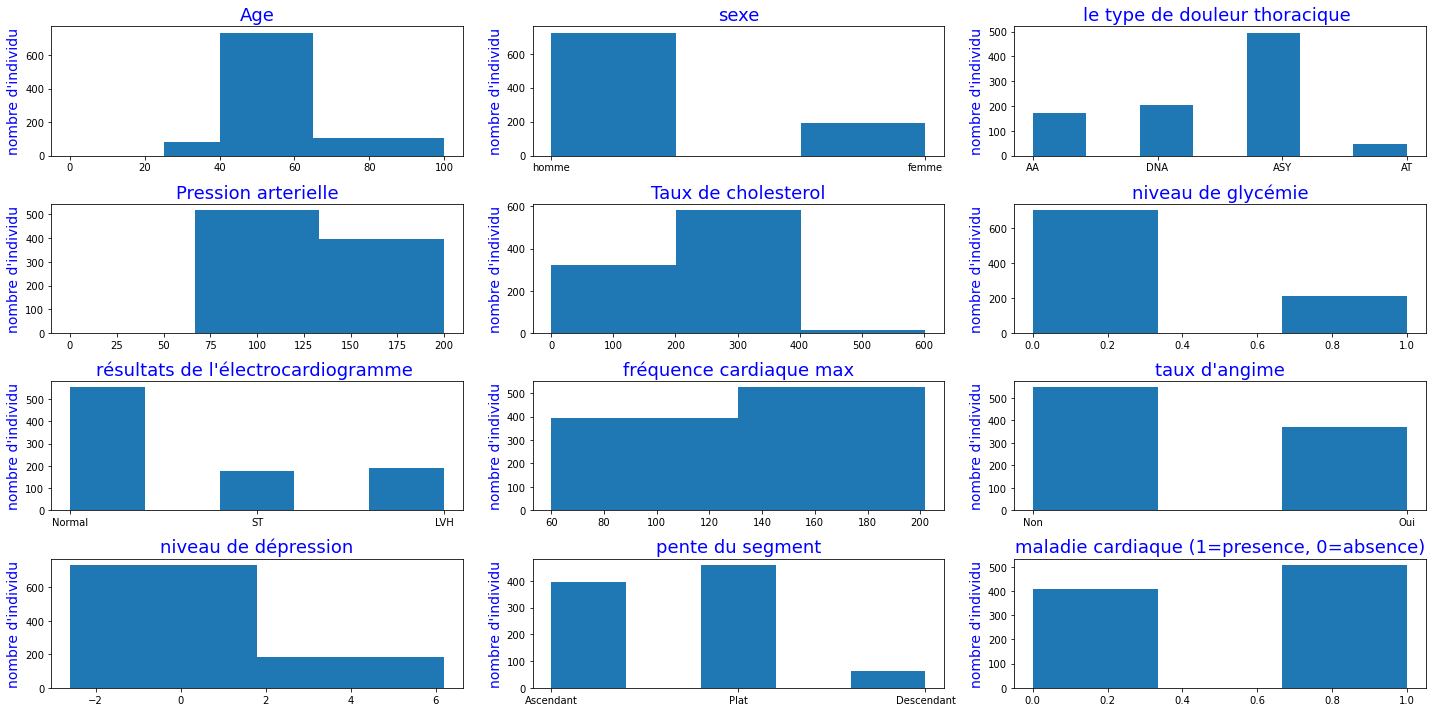

In [8]:
fig, ax1 = plt.subplots(4,3,figsize=(20,10))
bins=[0,25,40,65,100]
ax1[0,0].hist(df['AGE'], bins)
ax1[0,0].set_ylabel("nombre d'individu",color="blue",fontsize=14)
ax1[0,0].set_title("Age",fontsize=18, color="blue")


ax1[0,1].hist(df['SEXE'], bins=3)
ax1[0,1].set_ylabel("nombre d'individu",color="blue",fontsize=14)
ax1[0,1].set_title("sexe",fontsize=18, color="blue")



ax1[0,2].hist(df['TDT'], bins=7)
ax1[0,2].set_ylabel("nombre d'individu",color="blue",fontsize=14)
ax1[0,2].set_title("le type de douleur thoracique ",fontsize=18, color="blue")



ax1[1,0].hist(df['PAR'], bins=3)
ax1[1,0].set_ylabel("nombre d'individu",color="blue",fontsize=14)
ax1[1,0].set_title("Pression arterielle",fontsize=18, color="blue")



ax1[1,1].hist(df['CHOLESTEROL'], bins=3)
ax1[1,1].set_ylabel("nombre d'individu",color="blue",fontsize=14)
ax1[1,1].set_title("Taux de cholesterol",fontsize=18, color="blue")



ax1[1,2].hist(df['GAJ'], bins=3)
ax1[1,2].set_ylabel("nombre d'individu",color="blue",fontsize=14)
ax1[1,2].set_title("niveau de glycémie",fontsize=18, color="blue")


ax1[2,0].hist(df['ECG'], bins=5)
ax1[2,0].set_ylabel("nombre d'individu",color="blue",fontsize=14)
ax1[2,0].set_title("résultats de l'électrocardiogramme ",fontsize=18, color="blue")



ax1[2,1].hist(df['FCMAX'], bins=2)
ax1[2,1].set_ylabel("nombre d'individu",color="blue",fontsize=14)
ax1[2,1].set_title("fréquence cardiaque max",fontsize=18, color="blue")



ax1[2,2].hist(df['ANGINE'], bins=3)
ax1[2,2].set_ylabel("nombre d'individu",color="blue",fontsize=14)
ax1[2,2].set_title("taux d'angime",fontsize=18, color="blue")



ax1[3,0].hist(df['DEPRESSION '], bins=2)
ax1[3,0].set_ylabel("nombre d'individu",color="blue",fontsize=14)
ax1[3,0].set_title("niveau de dépression",fontsize=18, color="blue")



ax1[3,1].hist(df['PENTE'], bins=5)
ax1[3,1].set_ylabel("nombre d'individu",color="blue",fontsize=14)
ax1[3,1].set_title("pente du segment",fontsize=18, color="blue")



ax1[3,2].hist(df['CŒUR'], bins=3)
ax1[3,2].set_ylabel("nombre d'individu",color="blue",fontsize=14)
ax1[3,2].set_title("maladie cardiaque (1=presence, 0=absence)",fontsize=18, color="blue")

fig.tight_layout()

plt.show()

### CONCLUSION

après visualisation de chaque variable individuellement, on peut conclure que la majorité des individus ont entre 40 et 70 ans, nous avons donc affaire à une population adulte. Parmi cette population, près des 2/3 sont des hommes et 1/3 sont des femmes. Bon nombre ont un type de douleur thoracique asymptomatique. environ 2/3 ont un électrocardiogramme normal les 1/3 restant ont soit une anomalie de l'onde ST-T , soit une hypertrophie ventriculaire gauche probable. environ 2/3 n'ont pas d'angime et le reste ont une angime. Les 2/3 ont un niveau de glycémie inférieur à 120mg/dl et 1/3 ont un niveau de glycémie supérieur à 120mg/dl. les 1/3 sont dépressifs et les 2/3 sont non dépressif. environ 1/3 n'ont pas de maladie cardiaque et 2/3 ont une maladie cardiaque

### B-2) Visualisation des variales prises deux à deux

A ce niveau, nous débutons par verifier la relation avec la variable cible (maladie cardiaque) avant de chercher les relations entre les autres variables

#### B-2-1) Visualisation variables cible et autres variables

#### B-2-1-1) fixons la maladie cardiaque et le sexe

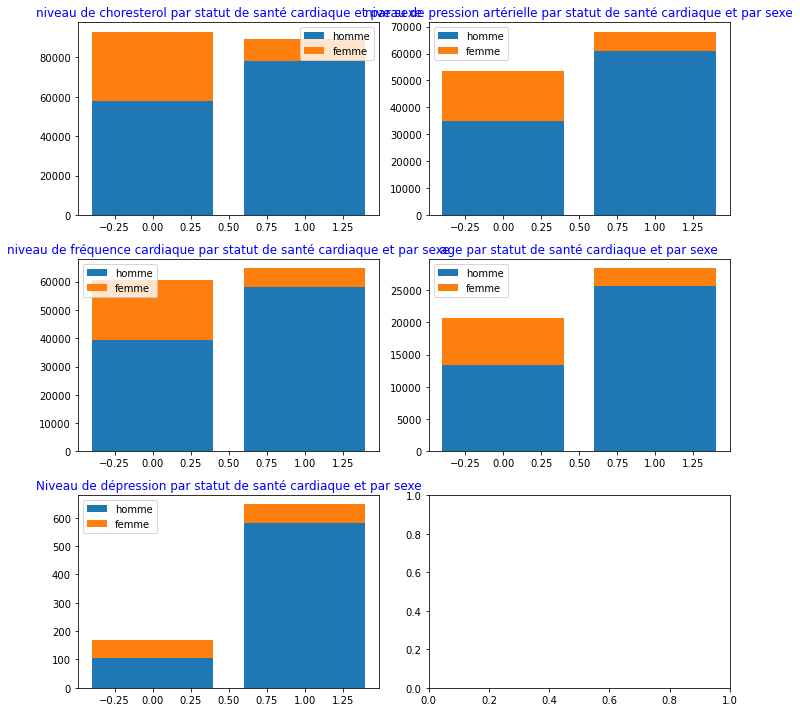

In [15]:
fig, ax1 = plt.subplots(3,2,figsize=(10,10))

ch1 = df.groupby(['CŒUR','SEXE'])['CHOLESTEROL'].sum().unstack().fillna(0)
ax1[0,0].bar(ch1.index, ch1['homme'], label='homme')
ax1[0,0].bar(ch1.index, ch1['femme'] , bottom=ch1['homme'], label='femme')
ax1[0,0].set_title("niveau de choresterol par statut de santé cardiaque et par sexe", color="blue")
ax1[0,0].legend()

pa1 = df.groupby(['CŒUR','SEXE'])['PAR'].sum().unstack().fillna(0)
ax1[0,1].bar(pa1.index, pa1['homme'], label='homme')
ax1[0,1].bar(pa1.index, pa1['femme'] , bottom=pa1['homme'], label='femme')
ax1[0,1].set_title("niveau de pression artérielle par statut de santé cardiaque et par sexe", color="blue")
ax1[0,1].legend()

fcm = df.groupby(['CŒUR','SEXE'])['FCMAX'].sum().unstack().fillna(0)
ax1[1,0].bar(fcm.index, fcm['homme'], label='homme')
ax1[1,0].bar(fcm.index, fcm['femme'] , bottom=fcm['homme'], label='femme')
ax1[1,0].set_title("niveau de fréquence cardiaque par statut de santé cardiaque et par sexe", color="blue")
ax1[1,0].legend()

ag1 = df.groupby(['CŒUR','SEXE'])['AGE'].sum().unstack().fillna(0)
ax1[1,1].bar(ag1.index, ag1['homme'], label='homme')
ax1[1,1].bar(ag1.index, ag1['femme'] , bottom=ag1['homme'], label='femme')
ax1[1,1].set_title("age par statut de santé cardiaque et par sexe", color="blue")
ax1[1,1].legend()

ag1 = df.groupby(['CŒUR','SEXE'])['DEPRESSION '].sum().unstack().fillna(0)
ax1[2,0].bar(ag1.index, ag1['homme'], label='homme')
ax1[2,0].bar(ag1.index, ag1['femme'] , bottom=ag1['homme'], label='femme')
ax1[2,0].set_title("Niveau de dépression par statut de santé cardiaque et par sexe", color="blue")
ax1[2,0].legend()

fig.tight_layout()


plt.show()

### conclusion partielle

étant donné la grande repartition des hommes dans le jeu de donnée, on a à peu près les même répartitions entre homme et femme
lorsqu'on observe par statut de santé cardiaque et par sexe une autre variable.

Toutefois les personnes malades ont légèrement plus fréquence cardiaque, plus de pression artérielle, moins de niveau de cholestérol et sont légèrements plus agés.

Enfin les personnes malades sont plus dépressif que les personnes non malade. 

#### B-2-1-2) fixons la maladie cardiaque et la pente du segment puis observons la relation avec les autres variables

<AxesSubplot:xlabel='CŒUR'>

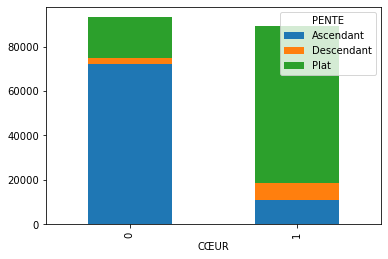

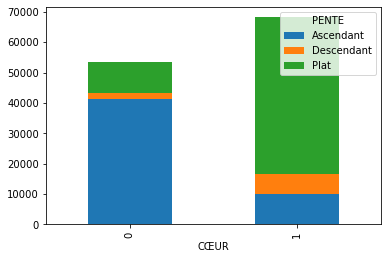

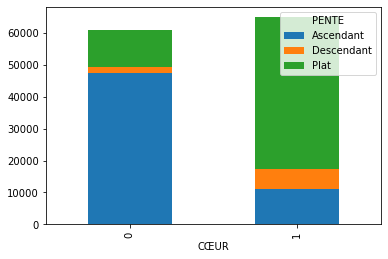

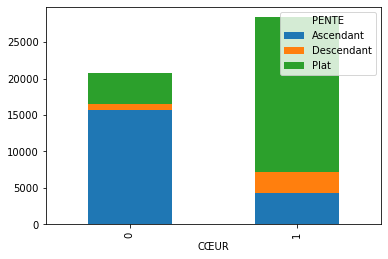

In [10]:


ch1 = df.groupby(['CŒUR','PENTE'])['CHOLESTEROL'].sum().unstack().fillna(0)
ch1.plot(kind='bar', stacked=True)

pa1 = df.groupby(['CŒUR','PENTE'])['PAR'].sum().unstack().fillna(0)
pa1.plot(kind='bar', stacked=True)

fcm = df.groupby(['CŒUR','PENTE'])['FCMAX'].sum().unstack().fillna(0)
fcm.plot(kind='bar', stacked=True)

ag1 = df.groupby(['CŒUR','PENTE'])['AGE'].sum().unstack().fillna(0)
ag1.plot(kind='bar', stacked=True)



### conclusion partielle

On retiens ici que les individus atteins de maladie cardiaque ont un niveau de pente du segment d'autant plus plat. Quant à ceux qui ne sont pas malades, ils ont une pente plus ascendante

#### B-2-1-3) fixons la maladie cardiaque et le taux d'angime puis observons la relation avec les autres variables

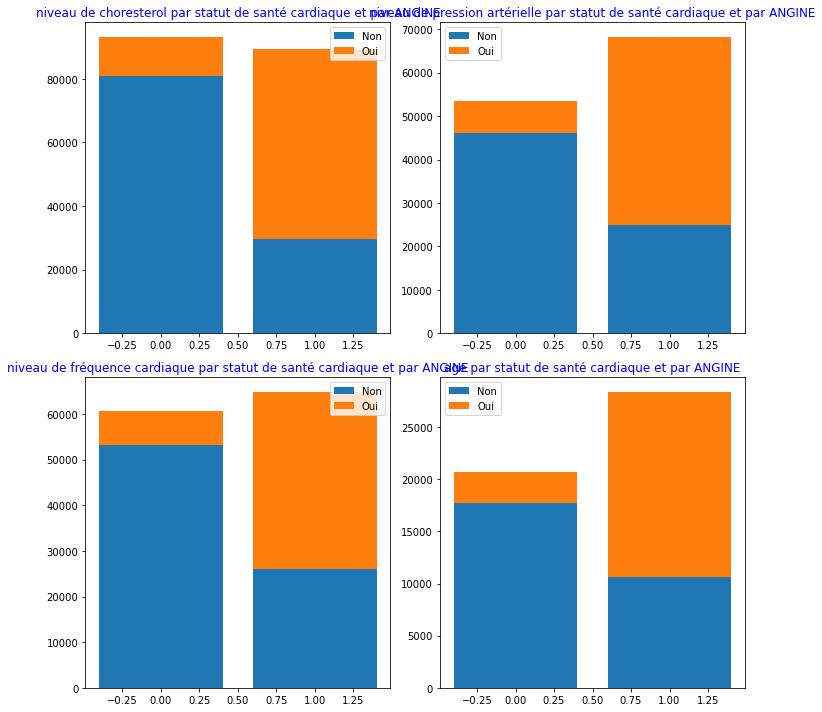

In [11]:
fig, ax1 = plt.subplots(2,2,figsize=(10,10))

ch1 = df.groupby(['CŒUR','ANGINE'])['CHOLESTEROL'].sum().unstack().fillna(0)
ax1[0,0].bar(ch1.index, ch1['Non'], label='Non')
ax1[0,0].bar(ch1.index, ch1['Oui'] , bottom=ch1['Non'], label='Oui')
ax1[0,0].set_title("niveau de choresterol par statut de santé cardiaque et par ANGINE", color="blue")
ax1[0,0].legend()

pa1 = df.groupby(['CŒUR','ANGINE'])['PAR'].sum().unstack().fillna(0)
ax1[0,1].bar(pa1.index, pa1['Non'], label='Non')
ax1[0,1].bar(pa1.index, pa1['Oui'] , bottom=pa1['Non'], label='Oui')
ax1[0,1].set_title("niveau de pression artérielle par statut de santé cardiaque et par ANGINE", color="blue")
ax1[0,1].legend()

fcm = df.groupby(['CŒUR','ANGINE'])['FCMAX'].sum().unstack().fillna(0)
ax1[1,0].bar(fcm.index, fcm['Non'], label='Non')
ax1[1,0].bar(fcm.index, fcm['Oui'] , bottom=fcm['Non'], label='Oui')
ax1[1,0].set_title("niveau de fréquence cardiaque par statut de santé cardiaque et par ANGINE", color="blue")
ax1[1,0].legend()

ag1 = df.groupby(['CŒUR','ANGINE'])['AGE'].sum().unstack().fillna(0)
ax1[1,1].bar(ag1.index, ag1['Non'], label='Non')
ax1[1,1].bar(ag1.index, ag1['Oui'] , bottom=ag1['Non'], label='Oui')
ax1[1,1].set_title("age par statut de santé cardiaque et par ANGINE", color="blue")
ax1[1,1].legend()

fig.tight_layout()


plt.show()

### Conclusion partielle

le niveau d'angime est d'autant plus élevé chez les individus malades. 

#### B-2-1-3) fixons la maladie cardiaque et le résultat de l'électrocardiogramme puis observons la relation avec les autres variables

<AxesSubplot:xlabel='CŒUR'>

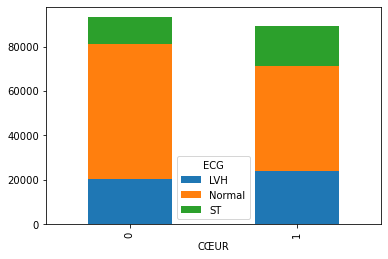

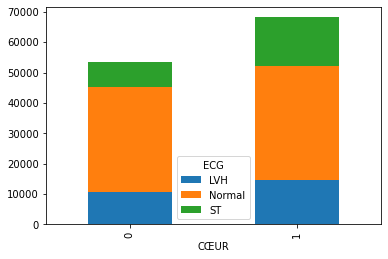

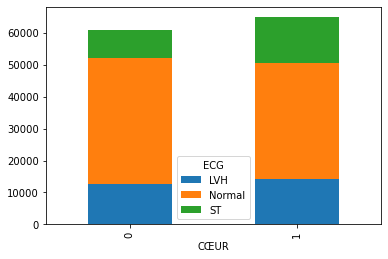

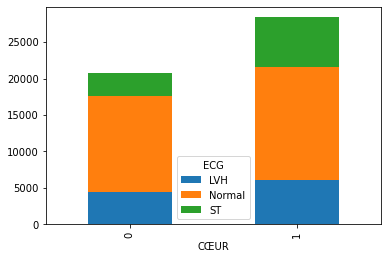

In [12]:
ch1 = df.groupby(['CŒUR','ECG'])['CHOLESTEROL'].sum().unstack().fillna(0)
ch1.plot(kind='bar', stacked=True)

pa1 = df.groupby(['CŒUR','ECG'])['PAR'].sum().unstack().fillna(0)
pa1.plot(kind='bar', stacked=True)

fcm = df.groupby(['CŒUR','ECG'])['FCMAX'].sum().unstack().fillna(0)
fcm.plot(kind='bar', stacked=True)

ag1 = df.groupby(['CŒUR','ECG'])['AGE'].sum().unstack().fillna(0)
ag1.plot(kind='bar', stacked=True)

### Conclusion partielle

on retrouve plus un électrocardiogramme normal au niveau des individus de ce jeu de donnée autant chez les individus malades que chez les individus non malade 

### B-2-1-4) fixons la maladie cardiaque et le type de douleur thoracique

<AxesSubplot:xlabel='CŒUR'>

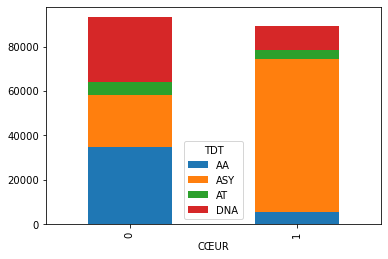

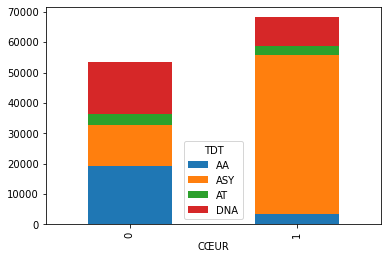

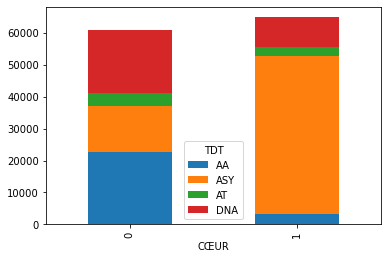

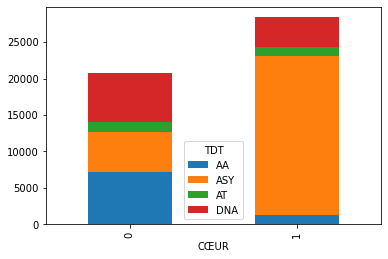

In [13]:
ch1 = df.groupby(['CŒUR','TDT'])['CHOLESTEROL'].sum().unstack().fillna(0)
ch1.plot(kind='bar', stacked=True)

pa1 = df.groupby(['CŒUR','TDT'])['PAR'].sum().unstack().fillna(0)
pa1.plot(kind='bar', stacked=True)

fcm = df.groupby(['CŒUR','TDT'])['FCMAX'].sum().unstack().fillna(0)
fcm.plot(kind='bar', stacked=True)

ag1 = df.groupby(['CŒUR','TDT'])['AGE'].sum().unstack().fillna(0)
ag1.plot(kind='bar', stacked=True)

#### Conclusion partielle

Les individus malades ont pour la plus part une douleur thoracique de type asymtomatique.

 ##                                            C'est ici que prends fin l'exercice.  